# Solving the discrete lunar lander problem with Deep Q Learning in PyTorch

In [2]:
import os
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 8]
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Epsilon decay curve

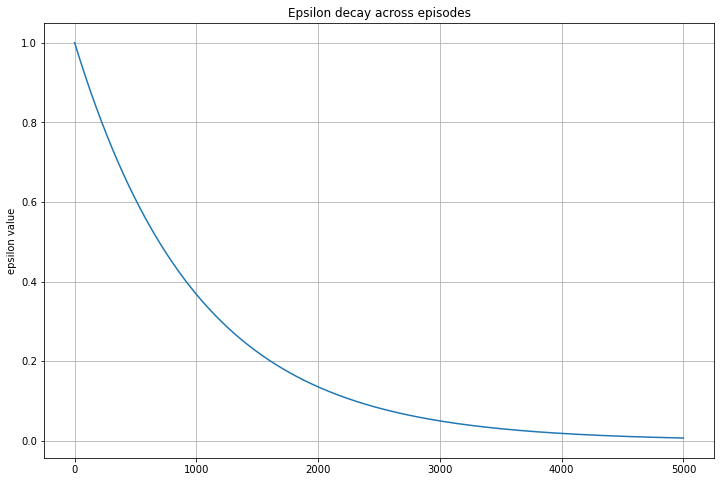

In [2]:
episodes = np.arange(5000)
epsilon_start = 1
epsilon_decay = 0.999
epsilon_min = 0.01
epsilon_episode = epsilon_decay**episodes * epsilon_start
episode_break = np.floor(math.log(epsilon_min / epsilon_start, epsilon_decay))

plt.plot(episodes, epsilon_episode)
plt.grid()
plt.title('Epsilon decay across episodes')
plt.ylabel('epsilon value')
plt.show()

In [3]:
print('Epsilon will reach the minimum of %s starting from episode %i.' % (epsilon_min, episode_break))

Epsilon will reach the minimum of 0.01 starting from episode 4602.


## Agent training

In [3]:
import gym
import LunarLander as ll
import pickle

Environment definition:

In [4]:
env = gym.make('LunarLander-v2')

Set `True` the variable below if you would train the agent. If `False`, the code picks the trained agent from the cache.

In [5]:
training_mode = False

The method `train()` alllows to run a training session of the reinforcemente learning agent.

In [6]:
if training_mode:
    # Define a new agent
    agent = ll.Autopilot(env)
    # Train the agent for 2500 epochs
    agent.train(env, n_episodes=2500)
    # Save the agent
    with open('cache/agent-custom.pickle', 'wb') as file:
        pickle.dump(agent, file)
    # Save the model checkpoint
    agent.model_save('cache/model-custom.pt')
else:
    # Load the trained agent
    with open('cache/agent.pickle', 'rb') as file:
        agent = pickle.load(file)

Consider the learning of the agent is incremental, so you can call `agent.train()` more times and start a new training session from the last session.

## Training evaluation

### Learning curve

The class `Autopilot` stores the total rewards by episode earned during the training session. By calling the method `train_history()`, you can get the training rewards. Furthermore, you can pass a value (`bin_window`) to reduce the vector in bins and return the mean of rewards within bins. This feature can be used to quickly smooth the learning curve.

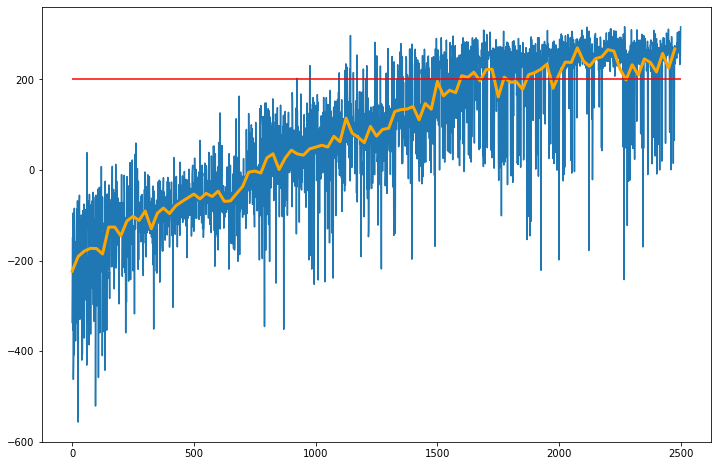

In [7]:
n_episodes = len(agent.train_history())

plt.plot(agent.train_history())

bin_size = 25
bin_avg = agent.train_history(bin_size)
plt.plot(np.array([*range(len(bin_avg))])*bin_size, bin_avg, color='orange', linewidth=3)

plt.hlines(y=200, xmin=0, xmax=n_episodes, color='red')

plt.show()

## Playing an episode

The agent comes with a `play` method, allowing to run an episode and get some performance indicators of the round. The argument `render` manage the rendering of the round, while `sleep` slows the presentation of frames. You can wrap the environment in order to save the episode into a video file.

In [26]:
# Optional: run if you need to save the render of the episode
env = gym.wrappers.Monitor(env, 'landing', video_callable=lambda episode_id: True)

In [9]:
# Use the agent to land on the Moon!
ll.play(env, agent, render=True, sleep=0.01)

{'duration': 311, 'reward': 252.509923984794, 'rest': True, 'solved': True}

## Evaluate performances

To evaluate the performances of the agent, the game is run 1000 times.

In [9]:
if training_mode:
    performances = [ll.play(env, agent) for i in range(1000)]

    with open('cache/performances.pickle', 'wb') as file:
        pickle.dump(performances, file)
else:
    with open('cache/performances.pickle', 'rb') as file:
        performances = pickle.load(file)

solved = [episode['solved'] for episode in performances]
reward = [episode['reward'] for episode in performances]

In [11]:
print('Proportion of solved:', np.mean(solved))

Proportion of solved: 0.989


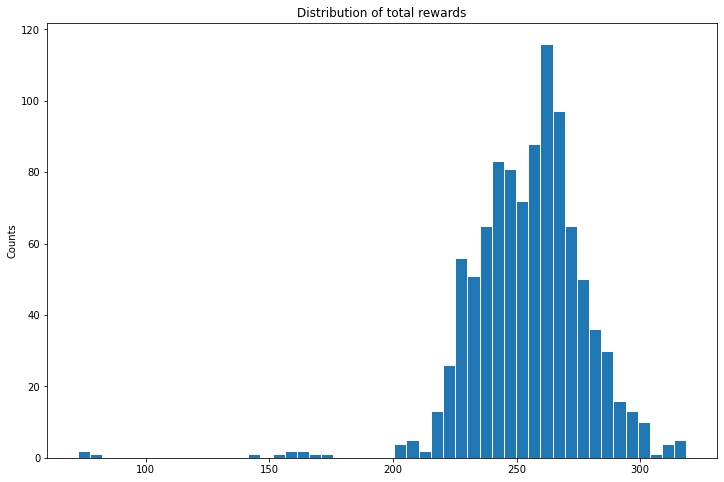

In [12]:
rewards = np.array([episode['reward'] for episode in performances])
plt.hist(rewards, bins=50, density=False, edgecolor='white')
plt.title('Distribution of total rewards')
plt.ylabel('Counts')
plt.show()

In [35]:
print('Mean of total rewards: %.2f' % np.mean(reward) )

Mean of total rewards: 254.57


In [36]:
print('Median of total rewards: %.2f' % np.median(reward) )

Median of total rewards: 256.43


In [37]:
print('The 95%% of total rewards is between %.2f and %.2f' % ( np.quantile(reward, 0.05), np.quantile(reward, 0.975) ) )

The 95% of total rewards is between 223.49 and 296.50
